# **Problem**

## **Dataset**

The dataset choosen for this experiment is hotel booking dataset. The dataset contains 43917 samples and 32 columns. The target variable in the dataset is **is_canceled**

## **Exercises**

### **Exercise 1**

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### **Exercise 2**

**Load the dataset**

In [2]:
link = "/content/hotel_bookings.csv"
data_set = pd.read_csv(link)
data_set.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
data_set.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
data_set.shape

(119390, 32)

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
data_set.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### **Exercise 3**

**Deal with null values appropriately**

In [7]:
data_set.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

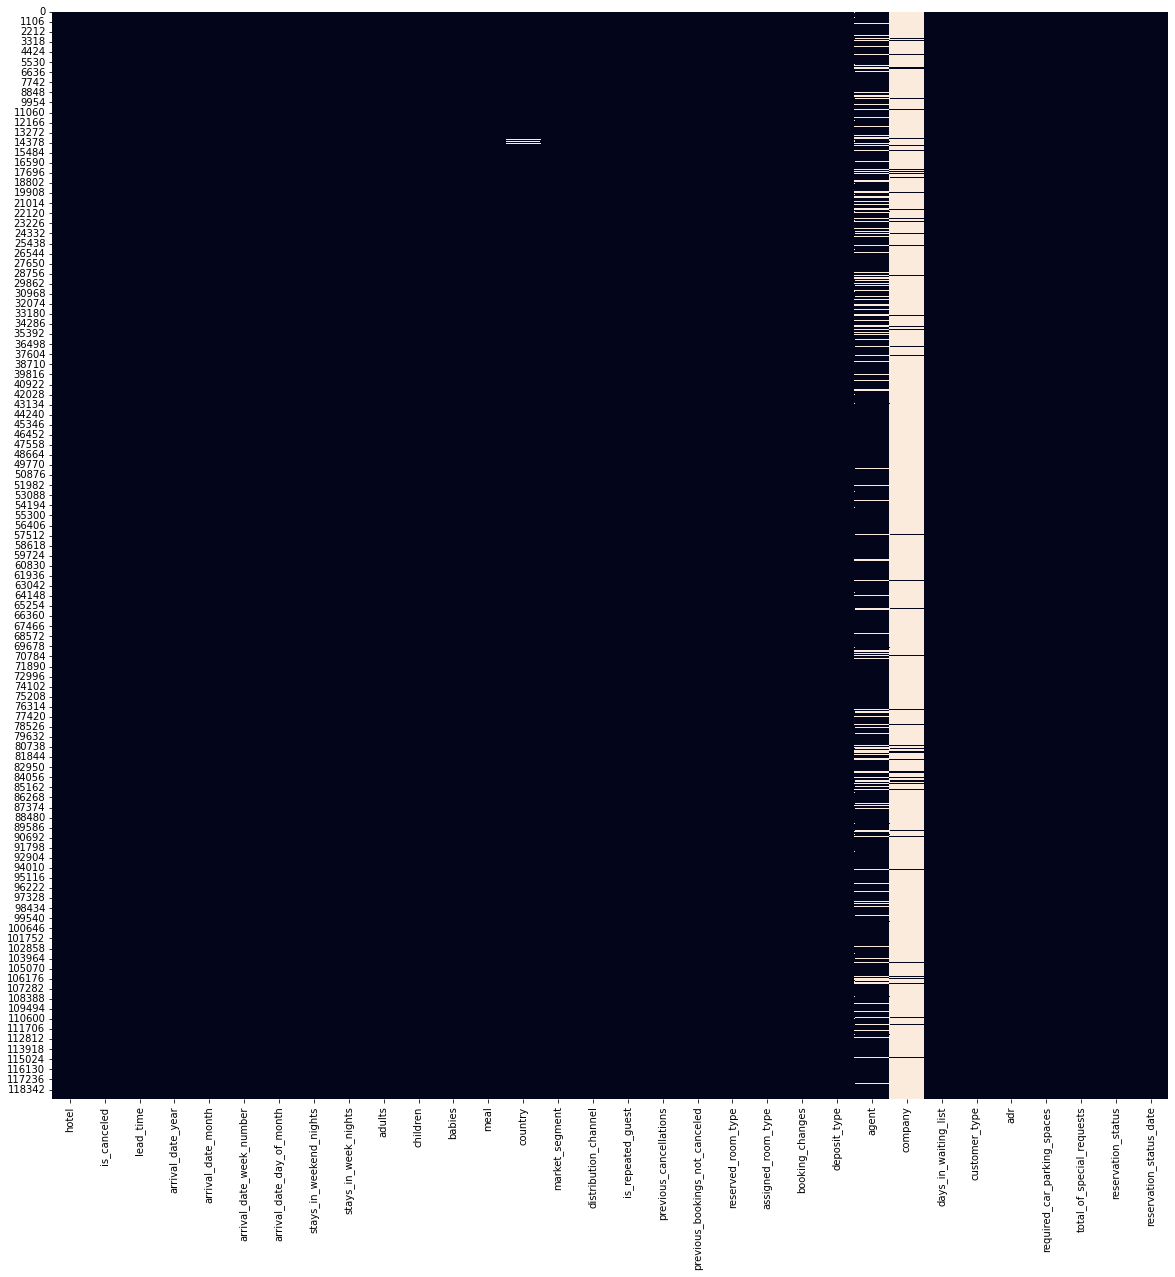

In [8]:
plt.figure(figsize=(20,20))
# sns.set_theme(style="")
sns.heatmap(data_set.isnull(),annot=False,cbar=False)
plt.show()

In [9]:
data_set[['agent','company']] = data_set[['agent','company']].fillna(0.0)

In [10]:
data_set.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [11]:
mod = data_set['country'].mode()

In [12]:
conv = mod.to_string()

In [13]:
data_set['country'].fillna(conv, inplace = True)

In [14]:
data_set.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [15]:
data_set['children'].fillna(round(data_set.children.mean()), inplace=True)

In [16]:
data_set.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

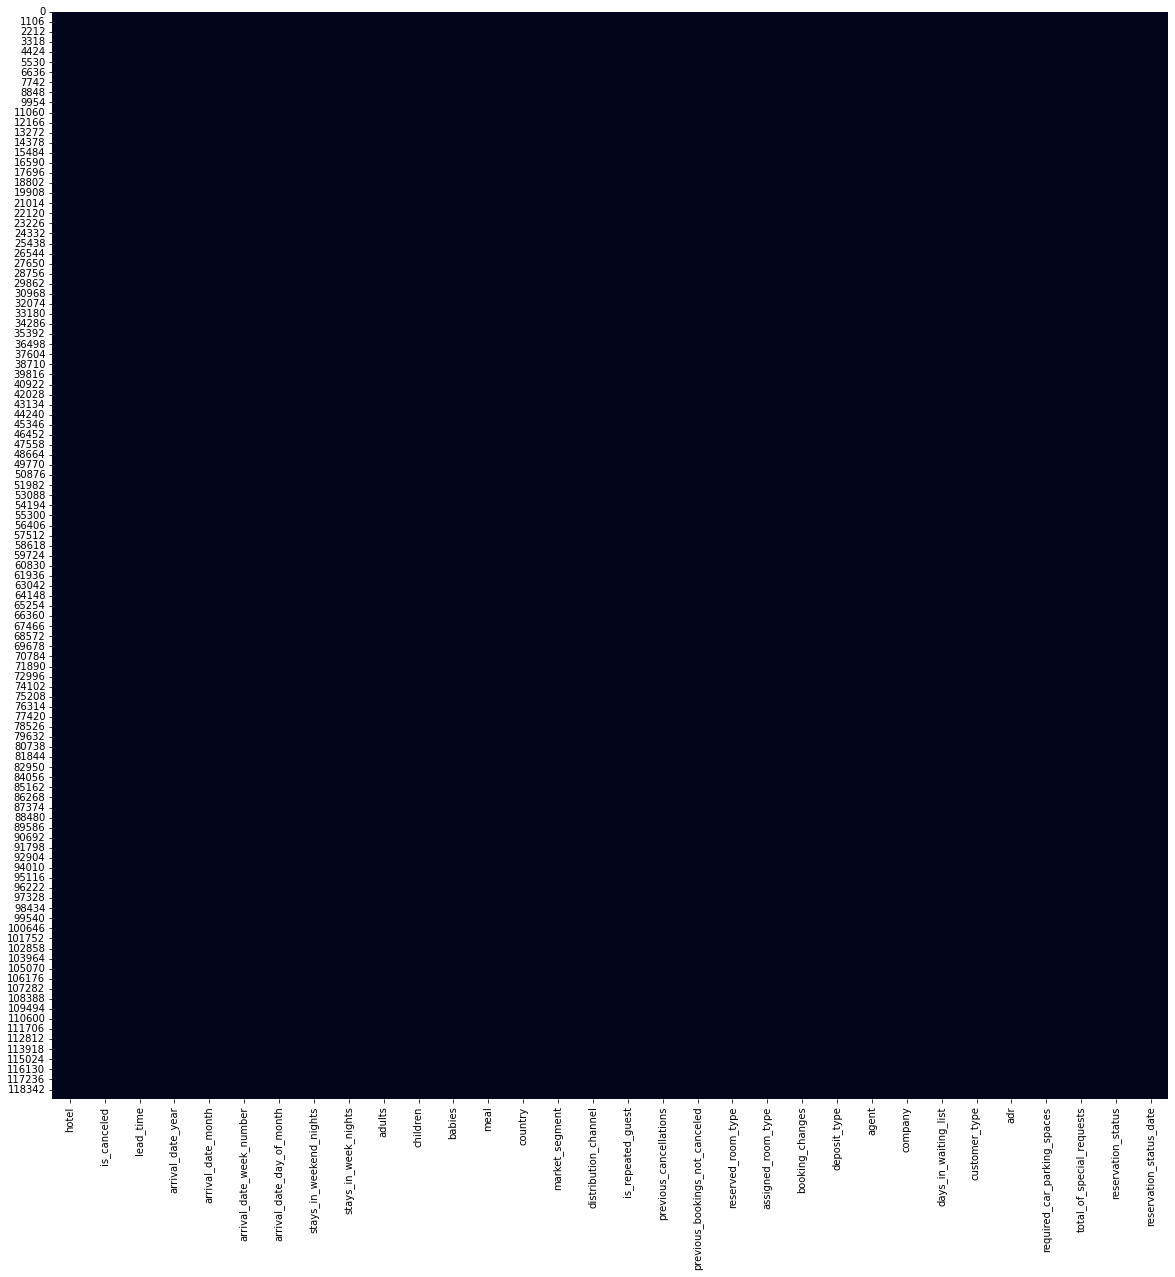

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(data_set.isnull(),annot=False,cbar=False)
plt.show()

In [18]:
data_set.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### **Exercise 4**

**Convert children, company, agent features to int64 datatype**

In [19]:
data_set['children'] = data_set['children'].astype('int64')
data_set['company'] = data_set['company'].astype('int64')
data_set['agent'] = data_set['agent'].astype('int64')

In [20]:
data_set.dtypes['children']
data_set.dtypes['company']
data_set.dtypes['agent']

dtype('int64')

In [21]:
data_set.company.unique()

array([  0, 110, 113, 270, 178, 240, 154, 144, 307, 268,  59, 204, 312,
       318,  94, 174, 274, 195, 223, 317, 281, 118,  53, 286,  12,  47,
       324, 342, 373, 371, 383,  86,  82, 218,  88,  31, 397, 392, 405,
       331, 367,  20,  83, 416,  51, 395, 102,  34,  84, 360, 394, 457,
       382, 461, 478, 386, 112, 486, 421,   9, 308, 135, 224, 504, 269,
       356, 498, 390, 513, 203, 263, 477, 521, 169, 515, 445, 337, 251,
       428, 292, 388, 130, 250, 355, 254, 543, 531, 528,  62, 120,  42,
        81, 116, 530, 103,  39,  16,  92,  61, 501, 165, 291, 290,  43,
       325, 192, 108, 200, 465, 287, 297, 490, 482, 207, 282, 437, 225,
       329, 272,  28,  77, 338,  72, 246, 319, 146, 159, 380, 323, 511,
       407, 278,  80, 403, 399,  14, 137, 343, 346, 347, 349, 289, 351,
       353,  54,  99, 358, 361, 362, 366, 372, 365, 277, 109, 377, 379,
        22, 378, 330, 364, 401, 232, 255, 384, 167, 212, 514, 391, 400,
       376, 402, 396, 302, 398,   6, 370, 369, 409, 168, 104, 40

### **Exercise 5**

**What is the percentage of booking for each year based and split it by hotel types Resort and City Hotels?**

**Show the insights in Plot**

NOTE: USE ONLY BOOKINGS WHICH ARE NOT CANCELLED

In [22]:
df = data_set.sample(frac=0.0030)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
52144,City Hotel,1,113,2016,May,23,31,0,3,1,...,Non Refund,0,202,0,Transient,100.00,0,0,Canceled,2016-04-11
47191,City Hotel,1,15,2016,February,7,12,0,2,2,...,No Deposit,9,0,0,Transient,79.00,0,0,Canceled,2016-01-28
90378,City Hotel,0,85,2016,June,23,4,1,1,2,...,No Deposit,9,0,0,Transient,131.40,0,1,Check-Out,2016-06-06
51552,City Hotel,1,32,2016,May,21,21,1,1,2,...,No Deposit,9,0,0,Transient,117.90,0,1,Canceled,2016-05-06
13465,Resort Hotel,1,37,2017,August,33,16,2,4,2,...,No Deposit,240,0,0,Transient,230.00,0,1,Canceled,2017-07-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84385,City Hotel,0,0,2016,February,9,24,0,1,2,...,No Deposit,9,0,0,Transient,97.00,0,1,Check-Out,2016-02-25
94500,City Hotel,0,91,2016,August,32,1,1,3,2,...,No Deposit,9,0,0,Transient,134.10,0,2,Check-Out,2016-08-05
28141,Resort Hotel,0,230,2016,September,37,8,4,10,2,...,No Deposit,243,0,0,Contract,90.90,0,0,Check-Out,2016-09-22
8268,Resort Hotel,0,328,2016,September,39,20,2,5,2,...,No Deposit,143,0,0,Transient,51.85,0,1,Check-Out,2016-09-27


In [23]:
year = data_set['arrival_date_year'].unique().tolist()
year

[2015, 2016, 2017]

Text(0.5, 1.0, 'Bookings by Year')

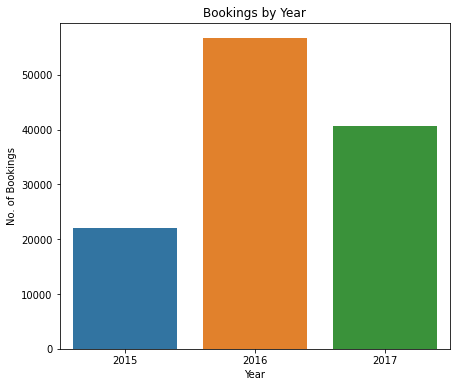

In [24]:
data = data_set.groupby("arrival_date_year")["arrival_date_year"].count()
plt.figure(figsize=(7,6))
sns.barplot(x=data.index, y=data, order=year)
plt.xlabel("Year")
plt.ylabel("No. of Bookings")
plt.title("Bookings by Year")

Text(0.5, 1.0, 'Booked Hotel type by country')

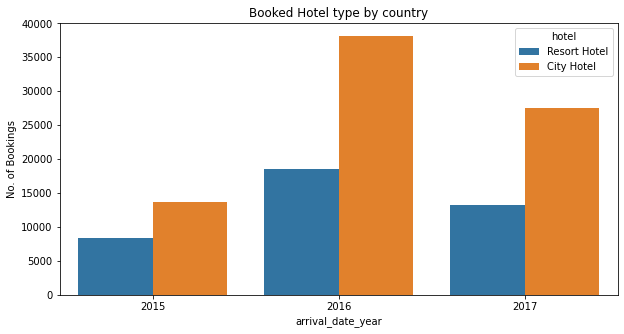

In [25]:
d = data_set['arrival_date_year'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.countplot(x='arrival_date_year', hue='hotel', data=data_set[data_set['arrival_date_year'].isin(d.index)])
plt.xlabel("arrival_date_year")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel type by country")

### **Exercise 6**

**Remove unwanted columns**

In [26]:
data_set.drop(['reservation_status','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date','previous_cancellations','previous_bookings_not_canceled'], axis = 1)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,is_repeated_guest,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,...,0,3,No Deposit,0,0,0,Transient,0.00,0,0
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,...,0,4,No Deposit,0,0,0,Transient,0.00,0,0
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,...,0,0,No Deposit,0,0,0,Transient,75.00,0,0
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,...,0,0,No Deposit,304,0,0,Transient,75.00,0,0
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,0,0,No Deposit,240,0,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0,0,BB,BEL,...,0,0,No Deposit,394,0,0,Transient,96.14,0,0
119386,City Hotel,0,102,2,5,3,0,0,BB,FRA,...,0,0,No Deposit,9,0,0,Transient,225.43,0,2
119387,City Hotel,0,34,2,5,2,0,0,BB,DEU,...,0,0,No Deposit,9,0,0,Transient,157.71,0,4
119388,City Hotel,0,109,2,5,2,0,0,BB,GBR,...,0,0,No Deposit,89,0,0,Transient,104.40,0,0


In [27]:
data_set['Room'] = 0
data_set.loc[ data_set['reserved_room_type'] == data_set['assigned_room_type'] , 'Room'] = 1

data_set['net_cancelled'] = 0
data_set.loc[ data_set['previous_cancellations'] > data_set['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [28]:
data_set

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Room,net_cancelled
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0


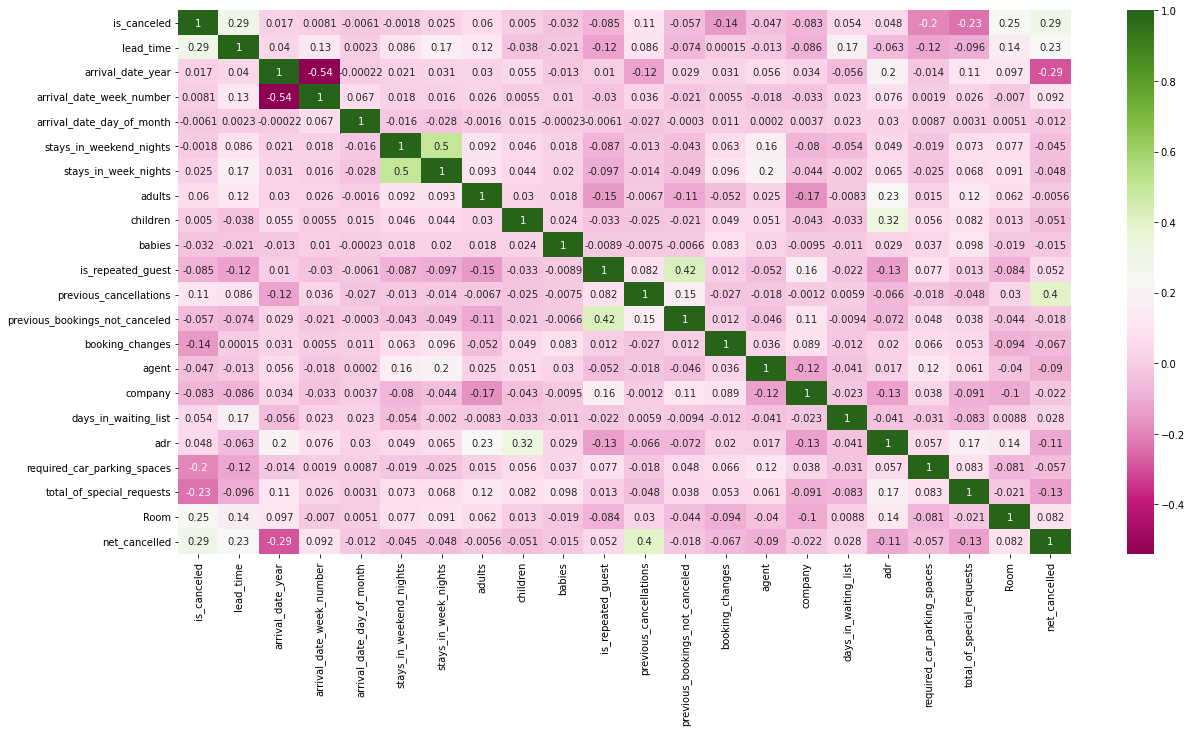

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_set.corr(), annot=True, cmap='PiYG')
plt.show()
plt.close()

### **Exercise 7**

**Convert all categorical data to numeric data using LabelEncoder**

In [30]:
hotel_le=LabelEncoder()
data_set['hotel']= hotel_le.fit_transform(data_set.hotel)

meal_le=LabelEncoder()
data_set['meal']= meal_le.fit_transform(data_set.meal)

country_le=LabelEncoder()
data_set['country']= country_le.fit_transform(data_set.country)

market_segment_le=LabelEncoder()
data_set['market_segment']= market_segment_le.fit_transform(data_set.market_segment) 

distribution_channel_le=LabelEncoder()
data_set['distribution_channel']= distribution_channel_le.fit_transform(data_set.distribution_channel)

reserved_room_type_le=LabelEncoder()
data_set['reserved_room_type ']= reserved_room_type_le.fit_transform(data_set.reserved_room_type)

reserved_room_type_le=LabelEncoder()
data_set['reserved_room_type']= reserved_room_type_le.fit_transform(data_set.reserved_room_type)

assigned_room_type_le=LabelEncoder()
data_set['assigned_room_type']= assigned_room_type_le.fit_transform(data_set.assigned_room_type)

deposit_type_le=LabelEncoder()
data_set['deposit_type']= deposit_type_le.fit_transform(data_set.deposit_type)

customer_type_le=LabelEncoder()
data_set['customer_type']= customer_type_le.fit_transform(data_set.customer_type)

In [31]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [32]:
data_set.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Room,net_cancelled,reserved_room_type
0,1,0,342,2015,July,27,1,0,0,2,...,0,2,0.0,0,0,Check-Out,2015-07-01,1,0,2
1,1,0,737,2015,July,27,1,0,0,2,...,0,2,0.0,0,0,Check-Out,2015-07-01,1,0,2
2,1,0,7,2015,July,27,1,0,1,1,...,0,2,75.0,0,0,Check-Out,2015-07-02,0,0,0
3,1,0,13,2015,July,27,1,0,1,1,...,0,2,75.0,0,0,Check-Out,2015-07-02,1,0,0
4,1,0,14,2015,July,27,1,0,2,2,...,0,2,98.0,0,1,Check-Out,2015-07-03,1,0,0


### **Exercise 8**

**Divide the dataset into train and test sets**

In [33]:
features = data_set.drop(['is_canceled'], axis=1)
target = data_set['is_canceled']

features = features.apply(pd.to_numeric, errors='coerce')
target = target.apply(pd.to_numeric, errors='coerce')

features.fillna(0, inplace=True)
target.fillna(0, inplace=True)

X_train , X_test, y_train , y_test = train_test_split(features, target, test_size=0.3, random_state=42)

for each in [X_train , X_test, y_train, y_test]:
    print(f"Shape: {each.shape}")

Shape: (83573, 34)
Shape: (35817, 34)
Shape: (83573,)
Shape: (35817,)


In [34]:
X_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Room,net_cancelled,reserved_room_type
9710,1,122,2016,0.0,53,27,0,4,2,0,...,0,2,74.75,0,2,0.0,0.0,1,0,3
40307,0,20,2015,0.0,30,22,0,2,2,0,...,0,3,62.00,0,0,0.0,0.0,1,0,0
110051,0,87,2017,0.0,16,16,2,3,3,0,...,0,2,171.00,0,0,0.0,0.0,1,0,3
22999,1,0,2017,0.0,5,2,0,1,1,0,...,0,2,43.00,0,1,0.0,0.0,1,0,0
8344,1,42,2016,0.0,39,23,0,1,2,0,...,0,2,109.00,0,1,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,0,2,2016,0.0,28,8,0,1,2,0,...,0,2,77.00,1,0,0.0,0.0,1,0,0
110268,0,91,2017,0.0,16,20,2,3,2,0,...,0,2,135.00,0,0,0.0,0.0,1,0,3
103694,0,74,2016,0.0,53,27,0,3,3,0,...,0,2,92.65,0,0,0.0,0.0,1,0,0
860,1,130,2015,0.0,31,1,2,5,2,0,...,0,2,120.60,0,2,0.0,0.0,1,0,0


### **Exercise 9**

**Apply Feature Scaling and Logistic Regression to predict the target variable and find the accuracy of the model without hyperparameter tuning.**

In [35]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [36]:
lr_model = LogisticRegression()
lr_model.fit(scaled_X_train, y_train)

train_preds = lr_model.predict(scaled_X_train)
test_preds = lr_model.predict(scaled_X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_preds) * 100:.2f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_preds) * 100:.2f}%")

Training Accuracy: 79.81%
Testing Accuracy: 79.93%
